# Rubber Price Prediction Project 

Table of Contents

## Part 1: Problem Statement

1. What is your problem statement? What will you actually be doing?
    - Predict ribbed smoked sheet price for estimate trend for 1 month for make maximum profit of that month.
2. Who is your audience? Why will they care?
    - rubber cooperative facing the problem with don't get maximum profit or worse loss money from rubber price fluctuation.
3. What is your success metric? How will you know if you are actually solving the problem in a useful way?
    - Better than use average ribbed smoked sheet price of previous month. use RMSE as metrics. 
4. What is your data source? What format is your data in? How much cleaning and munging will be required?
    - Data sources from raot.com for historical rubber prices and investing.com for futures price such as tocom, sicom, etc. and currency price.
    - Format of data are csv.
    - Cleaning parts are joining data with date from main dataset and clean missing vlaue.
5. What are potential challenges or obstacles and how will you mitigate them?
    - develop a good time series model because it hard to do it well and also how to approach to audience.
6. Is this a reasonable project given the time constraints that you have?
    - yes because this project isn't complex much. Now I have all data.
    
    
![workflow](../image/workflow.jpg)

### Problem Statements

Build model to predict **ribbed smoked sheet** prices next 1 month for estimate trend of prices for Rubber cooperative. Model performance will evaluate by RMSE, Model will deploy if performance better than baseline 10%.

### Background Information

- explain rubber industry in south
- explain what is rubber and rubber types
- explain why I need to do it
- explain who is my audience
- explain my goal

### Outside Research

- find research about rubber price
- find news about industry

### Dataset

Rubber Dataset<br>
Data dict

variables|meaning|dataset|source|
--|--|--|--|

From 
   1. rubber 2560-2565
   2. fob
   3. other prices 
   


# Part 2: Data Preparation

In [109]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
# Set chart style to ggplot
import matplotlib
matplotlib.style.use('ggplot')

from statsmodels.tsa.stattools import adfuller

### Import dataset
All data need to set date column as index for analysis.

In [110]:
# create function for import data and set date type to datetime and set as index
# and set end date in october
def import_csv_dateindex(csv_file):
    df = pd.read_csv(f'../data/{csv_file}')
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

#### Rubber

In [111]:
# import rubber_price dataset and set date as index
rubber_price = import_csv_dateindex('rubber_price.csv')
rubber_price.head()

,latex,cup_lump,rubber_sheet,ribbed_smoked_sheet
date,,,,
2017-09-19,NaN,NaN,52.56,55.04
2017-09-20,NaN,NaN,51.51,53.28
2017-09-21,NaN,NaN,51.51,53.14
2017-09-22,NaN,NaN,51.78,53.30
2017-09-25,NaN,NaN,50.58,53.22


In [112]:
# check types of all columns
# all columns store in correct type which is float
rubber_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2017-09-19 to 2022-10-31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latex                809 non-null    float64
 1   cup_lump             1052 non-null   float64
 2   rubber_sheet         1240 non-null   float64
 3   ribbed_smoked_sheet  1240 non-null   float64
dtypes: float64(4)
memory usage: 48.4 KB


In [113]:
# count value in rubber_price df
rubber_price.resample('y').count()

,latex,cup_lump,rubber_sheet,ribbed_smoked_sheet
date,,,,
2017-12-31,0,0,69,69
2018-12-31,0,123,242,242
2019-12-31,120,239,239,239
2020-12-31,243,244,244,244
2021-12-31,246,246,246,246
2022-12-31,200,200,200,200


**Latex** is empty in year 2017 and 2018 and have half in 2019. 

**Cup Lump** is empty in year 2017 and have half in year 2018.

#### FOB

In [114]:
# import fob dataset and set date as index
fob = import_csv_dateindex('FOB.csv')
fob.head()

,rubber_sheet,latex,bid_rubber_sheet,bid_rss,bid_latex,fob
date,,,,,,
2001-01-03,22.3,20.00,23.55,24.26,NaN,26.70
2001-01-04,22.3,19.50,23.25,24.30,NaN,26.25
2001-01-05,22.3,19.25,23.26,24.16,NaN,26.25
2001-01-08,22.3,19.25,23.45,24.20,NaN,25.85
2001-01-09,22.2,19.25,23.26,24.26,NaN,25.90


In [115]:
# check types of all columns
# all columns store in correct type which is float
fob.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5260 entries, 2001-01-03 to 2022-10-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rubber_sheet      5245 non-null   float64
 1   latex             5246 non-null   float64
 2   bid_rubber_sheet  5019 non-null   float64
 3   bid_rss           5221 non-null   float64
 4   bid_latex         1843 non-null   float64
 5   fob               5250 non-null   float64
dtypes: float64(6)
memory usage: 287.7 KB


In [116]:
# count value in fob df
fob.resample('y').count()

,rubber_sheet,latex,bid_rubber_sheet,bid_rss,bid_latex,fob
date,,,,,,
2001-12-31,244,244,244,243,0,242
2002-12-31,245,245,246,246,0,246
2003-12-31,244,244,244,244,0,243
2004-12-31,241,241,241,241,146,241
2005-12-31,234,234,234,234,234,234
2006-12-31,237,237,235,236,235,237
2007-12-31,241,241,241,241,241,241
2008-12-31,244,244,244,244,244,244
2009-12-31,238,238,238,238,238,238


this dataset contain Rubber sheet and Latex prices might same as `rubber_price` df and also have bid rubber price which is not relate to my goal.

**bid prices** is when you want to buy rubber from other people that had sold to government and government will allocate for someone or SME to bidding it.

fob is free on board rubber price which is ribbed smoked sheet in dice form price that foreign company (e.g. company from japan etc.) propose to buy it.

#### Related Prices

In [117]:
# import fob dataset and set date as index
related_prices = import_csv_dateindex('related_prices.csv')
related_prices.head()

,tocom,sicom,jpy,cny,usd,crude_oil
date,,,,,,
2010-12-03,361.7,NaN,NaN,NaN,NaN,NaN
2010-12-06,366.8,NaN,2.7530,NaN,0.0333,89.74
2010-12-07,368.5,NaN,2.7813,0.2214,0.0333,89.22
2010-12-08,369.3,NaN,2.7888,0.2211,0.0332,88.82
2010-12-09,372.0,NaN,2.7828,0.2213,0.0333,88.88


In [118]:
# check types of all columns
# all columns store in correct type which is float
related_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3144 entries, 2010-12-03 to 2022-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tocom      2916 non-null   float64
 1   sicom      1891 non-null   float64
 2   jpy        3106 non-null   float64
 3   cny        3105 non-null   float64
 4   usd        3106 non-null   float64
 5   crude_oil  3106 non-null   float64
dtypes: float64(6)
memory usage: 171.9 KB


In [119]:
# check missing values group in year
related_prices.resample('y').count()

,tocom,sicom,jpy,cny,usd,crude_oil
date,,,,,,
2010-12-31,19,0,20,19,20,19
2011-12-31,245,0,260,260,260,252
2012-12-31,248,0,261,261,261,252
2013-12-31,245,0,261,261,261,256
2014-12-31,244,0,261,261,261,260
2015-12-31,244,187,261,261,261,264
2016-12-31,245,251,261,261,261,264
2017-12-31,247,249,260,260,260,263
2018-12-31,247,249,261,261,261,264


All data 

### Merge all df

In [120]:
test_latex_price = pd.merge(fob['latex'].dropna(), rubber_price['latex'].dropna(), 
                how='left', left_index=True,right_index=True).dropna()

In [121]:
print(f'Rows of latex columns in rubber_price {test_latex_price.shape[0]}')
print(f"The value of Latex price in fob df has equal values with Latex in rubber_price is\
 {(test_latex_price['latex_x'] == test_latex_price['latex_y']).sum()}")

Rows of latex columns in rubber_price 808
The value of Latex price in fob df has equal values with Latex in rubber_price is 803


From value above almost prices in Latex columns are the same. Thus, I decided to drop latex prices from rubber_price and use latex price from fob df instead because fob df contain latex prices more than rubber_price df.

In [122]:
# merge rubber price and fob select only fob price
# for rubber_price drop latex
rubber = pd.merge(rubber_price.drop(columns='latex'), fob[['latex', 'fob']], how='left', left_index=True,right_index=True)

# merge rubber and related_prices
rubber = pd.merge(rubber, related_prices, how='left', left_index=True,right_index=True)

In [123]:
rubber.resample('y').count()

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,cny,usd,crude_oil
date,,,,,,,,,,,
2017-12-31,0,69,69,69,69,66,67,69,69,69,69
2018-12-31,123,242,242,238,238,230,234,242,242,242,241
2019-12-31,239,239,239,235,237,225,231,239,239,239,238
2020-12-31,244,244,244,243,244,229,235,244,244,244,242
2021-12-31,247,247,247,247,247,235,240,247,247,247,245
2022-12-31,200,200,200,198,198,187,194,200,200,200,200


For some columns they still have missing values but I will leave it there for now because I will decide to drop or impute in the feature selection part.

---

## Part 3: EDA

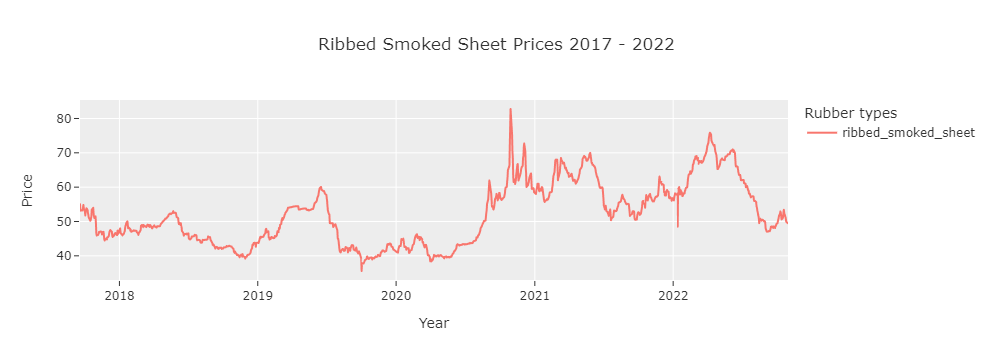

In [145]:
# plot ribbed_smoked_sheet price line chart
px.line(rubber, y=["ribbed_smoked_sheet"],title='Ribbed Smoked Sheet Prices 2017 - 2022',
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'})

From chart above it roughly hard to try analyze the chart because price are swing and messy. So, I decide to do a rolling for 1 month for smooth line chart.

In [125]:
# create function for plot line chart with moving average data
def plot_line(li_cols, rolling, df, title=None):
    # need to drop na for make line connected
    fig = px.line(df.rolling(rolling).mean().dropna(subset=li_cols), y=li_cols,
        title=title,
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'})
    fig.show()

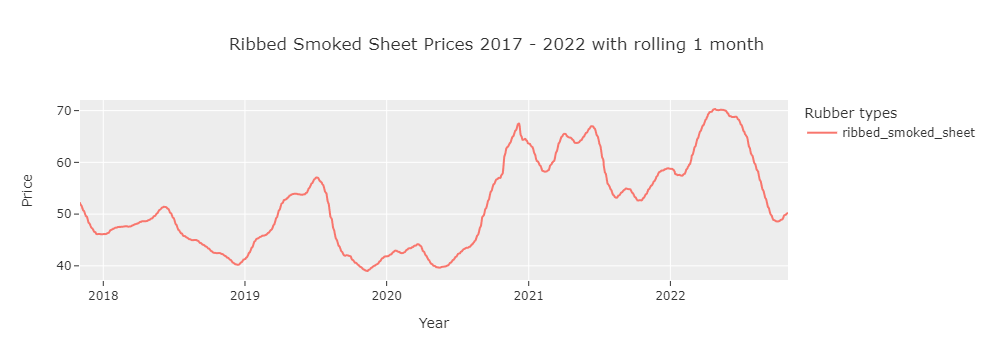

In [126]:
# plot ribbed_smoked_sheet price line chart
plot_line(['ribbed_smoked_sheet'], 30, rubber, 'Ribbed Smoked Sheet Prices 2017 - 2022 with rolling 1 month')

**Analysis**
- Ribbed smoke sheet prices have a chance to have seasonality
- Price will always rise up in middle of the year
- Price will always fall down in last of the year

### Rubber Types

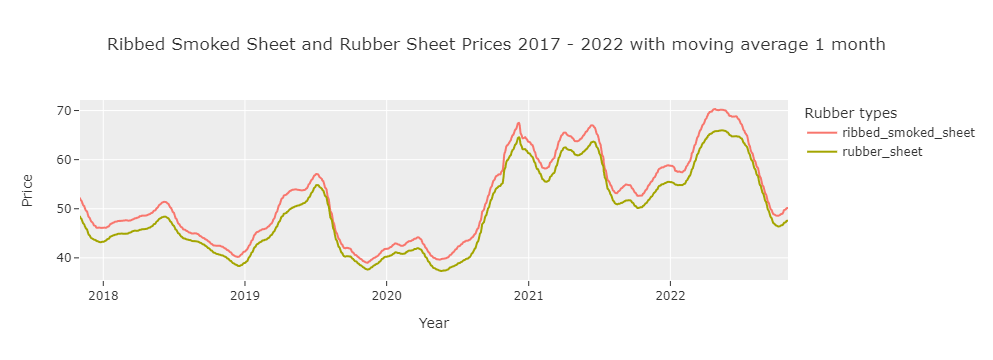

In [127]:
# plot ribbed_smoked_sheet and rubber_sheet price line chart
plot_line(['ribbed_smoked_sheet', 'rubber_sheet'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Rubber Sheet Prices 2017 - 2022 with moving average 1 month')

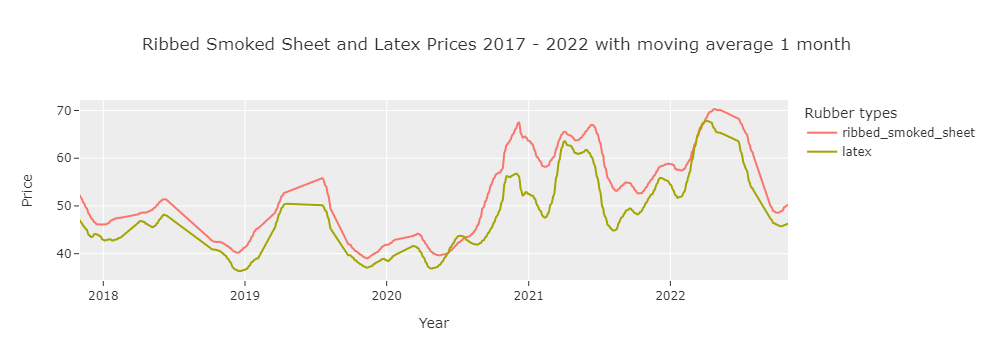

In [128]:
# plot ribbed_smoked_sheet and latex prices line chart
plot_line(['ribbed_smoked_sheet', 'latex'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Latex Prices 2017 - 2022 with moving average 1 month')

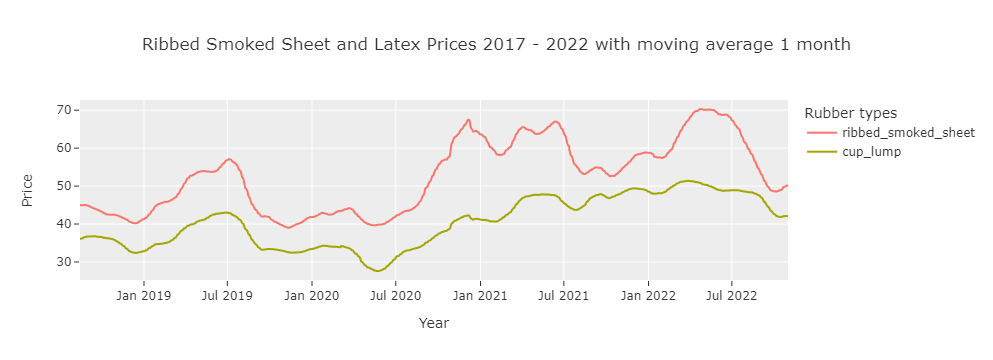

In [129]:
# plot ribbed_smoked_sheet and cup_lump prices line chart
plot_line(['ribbed_smoked_sheet', 'cup_lump'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Latex Prices 2017 - 2022 with moving average 1 month')

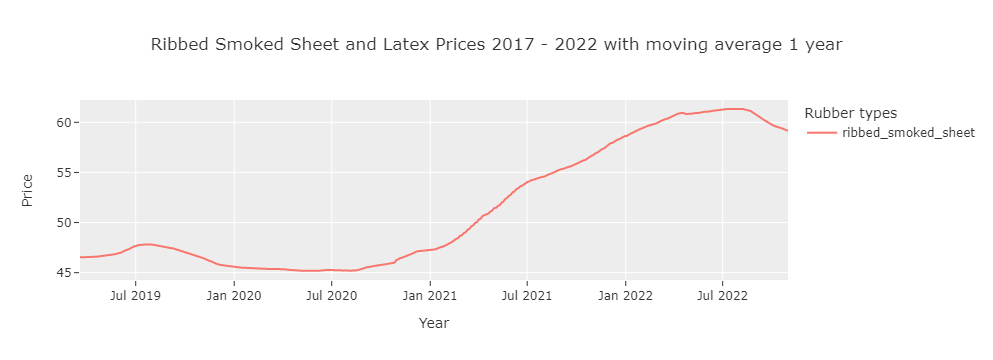

In [130]:
# plot ribbed_smoked_sheet and moving average for 1 year line chart
plot_line(['ribbed_smoked_sheet'], 365,
          rubber, title = 'Ribbed Smoked Sheet and Latex Prices 2017 - 2022 with moving average 1 year')

From chart above ribbed smoked sheet have trend price increase from year 2019 to year 2022

### Futures

#### Tocom

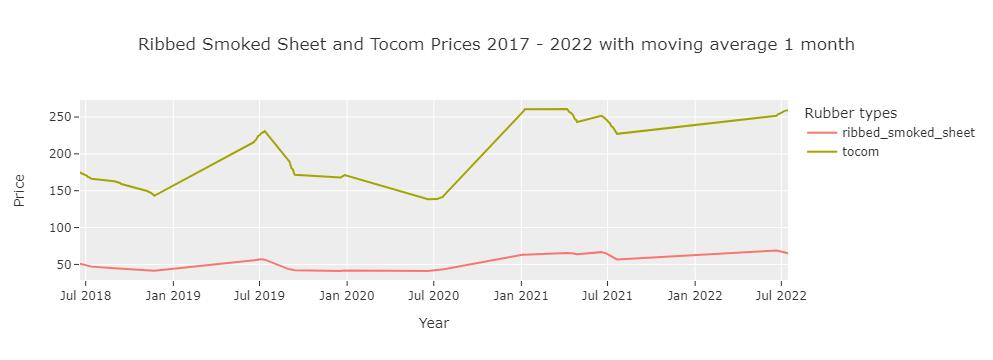

In [131]:
# plot ribbed_smoked_sheet and latex prices line chart
plot_line(['ribbed_smoked_sheet', 'tocom'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

Tocom prices currency is yen. Thus, need to convert price from Yen to Baht for eaiser to analysis.

In [138]:
# convert tocom price from yen to thb
rubber['tocom_thb'] = rubber['tocom'] / rubber['jpy']

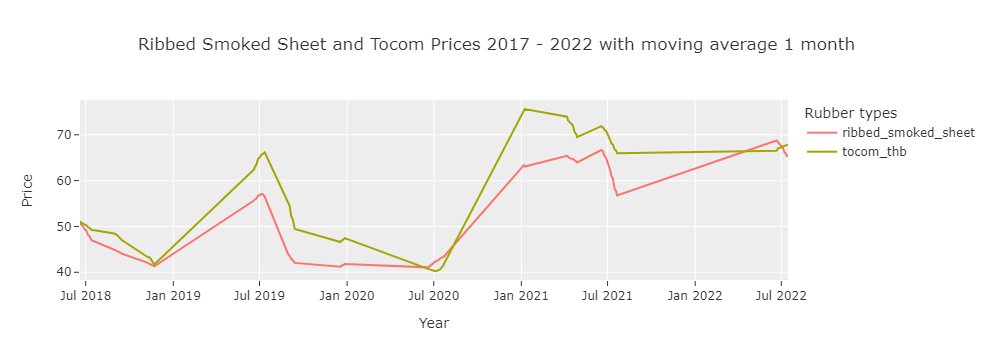

In [156]:
# plot ribbed_smoked_sheet and latex prices line chart
# with remove missing values for all varaibles
plot_line(['ribbed_smoked_sheet', 'tocom_thb'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

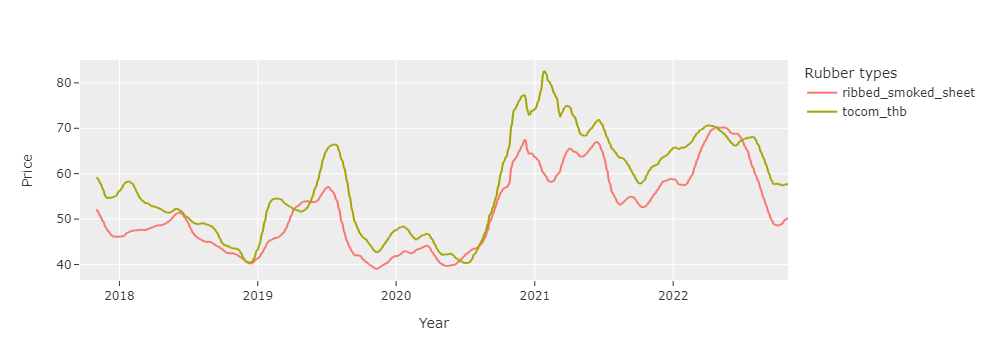

In [160]:
# # plot ribbed_smoked_sheet and latex prices line chart
# with fill missing values with last observed value to all varaibles
fig = px.line(rubber.fillna(method='ffill').rolling(30).mean(), y=['ribbed_smoked_sheet', 'tocom_thb'],
        title='',
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'})
fig.show()

#### Sicom

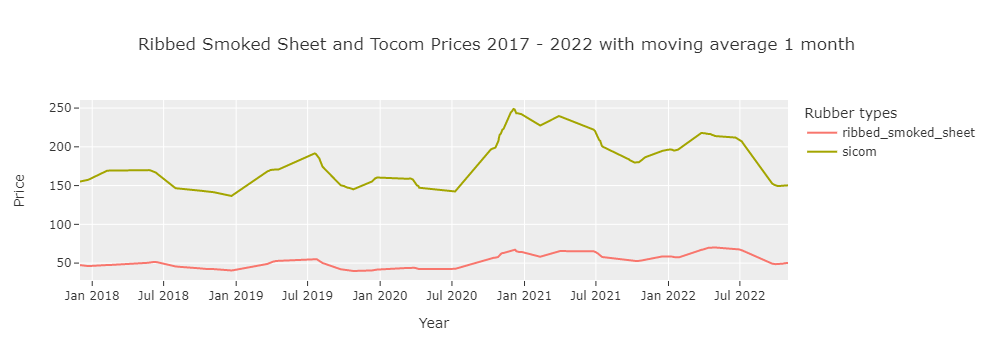

In [161]:
# plot ribbed_smoked_sheet and sicom prices line chart
plot_line(['ribbed_smoked_sheet', 'sicom'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

Tocom prices currency is yen. Thus, need to convert price from Yen to Baht for eaiser to analysis.

In [162]:
# convert tocom price from yen to thb
rubber['sicom_thb'] = rubber['sicom'] / rubber['cny']

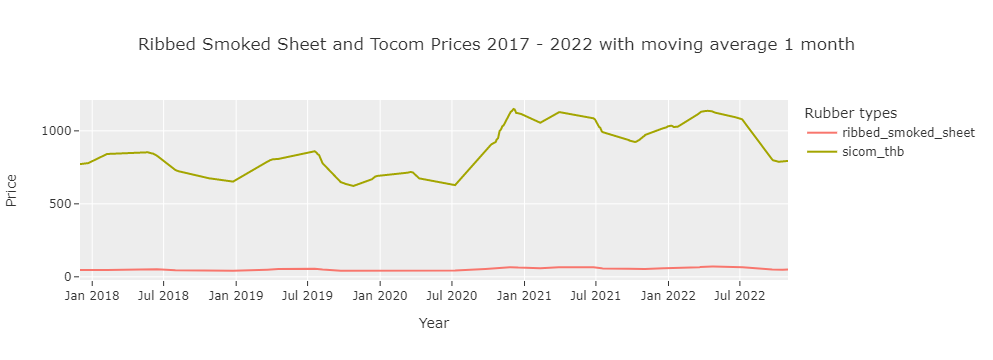

In [163]:
# plot ribbed_smoked_sheet and sicom prices line chart
# with remove missing values for all varaibles
plot_line(['ribbed_smoked_sheet', 'sicom_thb'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

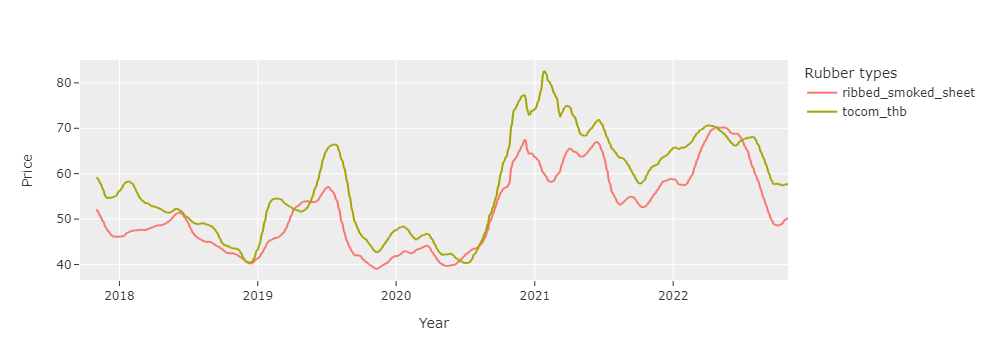

In [160]:
# # plot ribbed_smoked_sheet and latex prices line chart
# with fill missing values with last observed value to all varaibles
fig = px.line(rubber.fillna(method='ffill').rolling(30).mean(), y=['ribbed_smoked_sheet', 'sicom_thb'],
        title='',
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'})
fig.show()

### Currency

### Other commodity

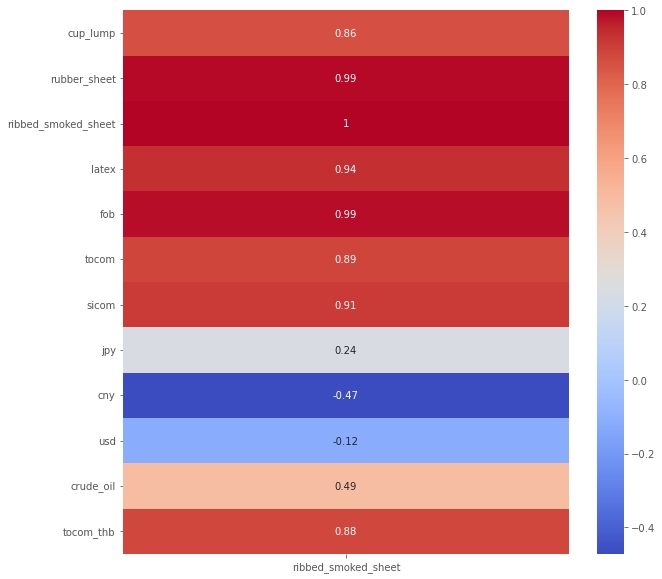

In [151]:
plt.figure(figsize=(10, 10))
sns.heatmap(rubber.corr()[['ribbed_smoked_sheet']], annot=True, cmap='coolwarm');

In [132]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], 
                         index=['Test Statistic','p-value', 
                                'Lag Used'])
    return dfoutput

In [133]:
# Run ADF test on the original Real GDP data
interpret_dftest(adfuller(rubber['ribbed_smoked_sheet'].dropna()))

Test Statistic   -2.095544
p-value           0.246310
Lag Used          5.000000
dtype: float64